In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_D = pd.read_csv('D-train.csv')
df_D

,x1,x2,x3,x4,x5,y
0,3.29,13.54,9.40,12.62,1.95,B
1,-10.87,24.20,24.09,23.96,0.11,B
2,-20.62,32.28,32.31,33.47,-1.30,B
3,3.01,0.44,19.68,-8.05,2.38,A
4,7.53,2.31,4.71,-0.88,2.25,B
...,...,...,...,...,...,...
185,-5.74,-11.02,-11.08,-8.11,-2.61,A
186,3.59,8.10,2.17,8.51,1.26,B
187,-5.97,-16.04,13.05,-24.04,-0.77,A
188,-41.36,-22.59,-18.71,-10.61,-12.06,C


In [3]:
df_D.describe()

,x1,x2,x3,x4,x5
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,-4.140053,-2.780053,1.095211,-2.904158,-0.971684
std,15.743802,13.244920,16.433007,15.303813,3.985057
min,-41.360000,-29.760000,-51.640000,-38.460000,-12.060000
25%,-16.165000,-12.505000,-12.490000,-12.737500,-3.542500
50%,-5.940000,-3.265000,1.180000,-4.185000,-1.235000
75%,8.215000,4.250000,13.035000,7.315000,2.250000
max,32.940000,34.790000,51.240000,37.960000,7.320000


In [4]:
df_D.drop_duplicates(inplace=True)
df_D.dropna(inplace=True)

In [5]:
df_D.describe()

,x1,x2,x3,x4,x5
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,-4.140053,-2.780053,1.095211,-2.904158,-0.971684
std,15.743802,13.244920,16.433007,15.303813,3.985057
min,-41.360000,-29.760000,-51.640000,-38.460000,-12.060000
25%,-16.165000,-12.505000,-12.490000,-12.737500,-3.542500
50%,-5.940000,-3.265000,1.180000,-4.185000,-1.235000
75%,8.215000,4.250000,13.035000,7.315000,2.250000
max,32.940000,34.790000,51.240000,37.960000,7.320000


In [6]:
Y = df_D['y']
df_D.drop(columns='y',inplace=True)
Y

0      B
1      B
2      B
3      A
4      B
      ..
185    A
186    B
187    A
188    C
189    C
Name: y, Length: 190, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9577dcd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9577fa2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9577dca90>,
 'medians': [<matplotlib.lines.Line2D at 0x1c9577fa7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c9577faa90>,
 'means': []}

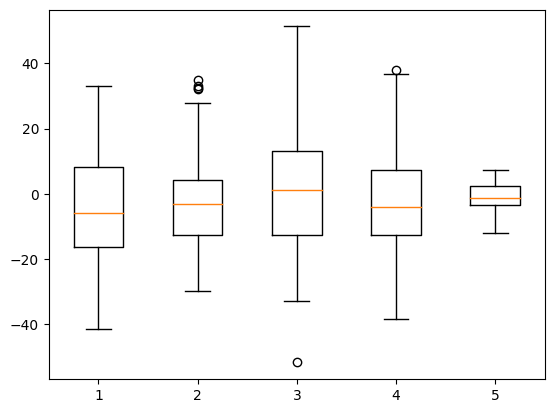

In [7]:
fig,ax = plt.subplots()
ax.boxplot(df_D)


In [8]:
columns_cont = []
for i in df_D.columns:
    columns_cont.append(i)
    

In [9]:
df_x_test = pd.read_csv('D-test.csv')
df_x_test.drop(columns = 'y',inplace = True)
df_D = df_D.append(df_x_test)

In [10]:
df_D

,x1,x2,x3,x4,x5
0,3.29,13.54,9.40,12.62,1.95
1,-10.87,24.20,24.09,23.96,0.11
2,-20.62,32.28,32.31,33.47,-1.30
3,3.01,0.44,19.68,-8.05,2.38
4,7.53,2.31,4.71,-0.88,2.25
...,...,...,...,...,...
5,2.20,9.24,-5.77,13.47,0.30
6,-8.28,-5.53,20.95,-13.24,-0.36
7,-15.23,25.83,20.04,28.76,-1.23
8,-23.17,-18.72,-6.80,-15.12,-6.61


In [11]:
scale = preprocessing.StandardScaler()
df_D = pd.DataFrame(scale.fit_transform(df_D),columns = columns_cont)

In [12]:
df_D

,x1,x2,x3,x4,x5
0,0.454594,1.226797,0.505140,1.013238,0.714943
1,-0.441575,2.030130,1.412625,1.750411,0.253503
2,-1.058641,2.639036,1.920421,2.368622,-0.100100
3,0.436873,0.239587,1.140194,-0.330444,0.822779
4,0.722938,0.380509,0.215412,0.135652,0.790178
...,...,...,...,...,...
195,0.385609,0.902751,-0.431997,1.068494,0.301152
196,-0.277657,-0.210310,1.218649,-0.667827,0.135636
197,-0.717514,2.152967,1.162433,2.062442,-0.082545
198,-1.220027,-1.204303,-0.495626,-0.790039,-1.431754


In [13]:
df_use_predict = df_D.tail(10)
df_D.drop(df_D.tail(10).index,inplace=True)
df_use_predict

,x1,x2,x3,x4,x5
190,1.124189,0.086607,-0.645124,0.068045,0.850365
191,2.740585,-0.565253,0.118424,-1.393298,2.575748
192,0.184351,-0.319581,-0.817478,-0.056117,-0.135209
193,-0.031464,-1.480119,0.229620,-1.710529,-0.087561
194,-0.301707,-0.223874,0.825756,-0.511162,-0.024865
195,0.385609,0.902751,-0.431997,1.068494,0.301152
196,-0.277657,-0.210310,1.218649,-0.667827,0.135636
197,-0.717514,2.152967,1.162433,2.062442,-0.082545
198,-1.220027,-1.204303,-0.495626,-0.790039,-1.431754
199,1.086216,1.445340,0.335257,1.156902,1.274188


In [14]:
df_D

,x1,x2,x3,x4,x5
0,0.454594,1.226797,0.505140,1.013238,0.714943
1,-0.441575,2.030130,1.412625,1.750411,0.253503
2,-1.058641,2.639036,1.920421,2.368622,-0.100100
3,0.436873,0.239587,1.140194,-0.330444,0.822779
4,0.722938,0.380509,0.215412,0.135652,0.790178
...,...,...,...,...,...
185,-0.116904,-0.624034,-0.760026,-0.334344,-0.428625
186,0.473580,0.816841,0.058502,0.746062,0.541903
187,-0.131460,-1.002339,0.730621,-1.369896,0.032815
188,-2.371250,-1.495944,-1.231375,-0.496860,-2.798518


In [15]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_D, Y, test_size=0.3, random_state=42)

In [16]:
# Create Model List
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier(),'SVC' : SVC() }
# Create Parameter Dictionary for KNN
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)
# Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators= nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,max_features = maxF)
kernel = ['rbf','poly']
C_list = [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]
Gamma_list = [0.01, 0.1, 1.0, 10]
d_list = [2, 3]
SVC_params = dict(kernel = kernel,C = C_list,gamma = Gamma_list,degree = d_list)

In [17]:
grid_KNN = GridSearchCV( estimator = classification['KNN'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = KNN_param )
grid_result_KNN = grid_KNN.fit(X_train,Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2; 1/15] START n_neighbors=1..............................................
[CV 1/2; 1/15] END ...............n_neighbors=1;, score=0.731 total time=   0.0s
[CV 2/2; 1/15] START n_neighbors=1..............................................
[CV 2/2; 1/15] END ...............n_neighbors=1;, score=0.803 total time=   0.0s
[CV 1/2; 2/15] START n_neighbors=3..............................................
[CV 1/2; 2/15] END ...............n_neighbors=3;, score=0.806 total time=   0.0s
[CV 2/2; 2/15] START n_neighbors=3..............................................
[CV 2/2; 2/15] END ...............n_neighbors=3;, score=0.818 total time=   0.0s
[CV 1/2; 3/15] START n_neighbors=5..............................................
[CV 1/2; 3/15] END ...............n_neighbors=5;, score=0.806 total time=   0.0s
[CV 2/2; 3/15] START n_neighbors=5..............................................
[CV 2/2; 3/15] END ...............n_neighbors=5;

In [18]:
grid_DT = GridSearchCV( estimator = classification['DT'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = DT_param )
grid_result_DT = grid_DT.fit(X_train,Y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 1/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.746 total time=   0.0s
[CV 2/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 2/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.773 total time=   0.0s
[CV 1/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 1/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.687 total time=   0.0s
[CV 2/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 2/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.788 total time=   0.0s
[CV 1/2; 3/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_le

In [19]:
grid_RF = GridSearchCV( estimator = classification['RF'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = RF_param )
grid_result_RF = grid_RF.fit(X_train,Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.761 total time=   0.0s
[CV 2/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.806 total time=   0.0s
[CV 2/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_sample

In [20]:
grid_SVC = GridSearchCV( estimator=  classification['SVC'], n_jobs = 1, verbose = 10, scoring = 'accuracy', cv = 2, param_grid = SVC_params)
grid_result_SVC = grid_SVC.fit(X_train, Y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 1/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.358 total time=   0.0s
[CV 2/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 2/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.364 total time=   0.0s
[CV 1/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 1/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.358 total time=   0.0s
[CV 2/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 2/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.364 total time=   0.0s
[CV 1/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.....................
[CV 1/2; 3/96] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 2/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.............

In [21]:
print('Best params: ',grid_result_KNN.best_params_)
print('Best score: ', grid_result_KNN.best_score_)
print('Best params: ',grid_result_DT.best_params_)
print('Best score: ', grid_result_DT.best_score_)
print('Best params: ',grid_result_RF.best_params_)
print('Best score: ', grid_result_RF.best_score_)
print('Best params: ',grid_result_SVC.best_params_)
print('Best score: ', grid_result_SVC.best_score_)

Best params:  {'n_neighbors': 13}
Best score:  0.8272274988692899
Best params:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2}
Best score:  0.8042740841248304
Best params:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 30}
Best score:  0.8120759837177748
Best params:  {'C': 10.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best score:  0.8496155585707825


In [22]:
df_use_predict

,x1,x2,x3,x4,x5
190,1.124189,0.086607,-0.645124,0.068045,0.850365
191,2.740585,-0.565253,0.118424,-1.393298,2.575748
192,0.184351,-0.319581,-0.817478,-0.056117,-0.135209
193,-0.031464,-1.480119,0.229620,-1.710529,-0.087561
194,-0.301707,-0.223874,0.825756,-0.511162,-0.024865
195,0.385609,0.902751,-0.431997,1.068494,0.301152
196,-0.277657,-0.210310,1.218649,-0.667827,0.135636
197,-0.717514,2.152967,1.162433,2.062442,-0.082545
198,-1.220027,-1.204303,-0.495626,-0.790039,-1.431754
199,1.086216,1.445340,0.335257,1.156902,1.274188


In [23]:
svc = SVC(C=grid_result_SVC.best_params_['C'],
degree = grid_result_SVC.best_params_['degree'], 
gamma = grid_result_SVC.best_params_['gamma'],
kernel = grid_result_SVC.best_params_['kernel'])
svc.fit(X_train,Y_train)
y_pred= svc.predict(df_use_predict)
print(y_pred)

['A' 'A' 'C' 'A' 'C' 'B' 'C' 'B' 'C' 'B']
